# Preprocessing Data

### Importing necessary libraries for preprocessing the data

In [1]:
#Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

### Importing the data repo from UCL to preprocess and checking if the data is available to print (default code)

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

### Displaying the available data in X and y

In [5]:
X #contain features

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [6]:
y # contains target

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


In [5]:
# df_census_data.dtypes

### Combining the feature and target data to a single column for a single dataframe

In [8]:
# Assigning X table to a different variable
df_census_data = X

# Creating a new column to bind the income column
df_census_data["target"] = y
df_census_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


### Checking the shape of the dataframe

In [9]:
df_census_data.shape

(48842, 15)

In [10]:
df_census_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

### Checking if there are duplicate rows

It's essential to check if there is duplicate data in a data repository before feeding it to a model. If there are duplicate data (here we are considering duplicate rows) it might lead to a reduction in data quality which will harm the data integrity. Also, this might increase the computational efficiency by removing duplicate datasets because it reduces the data size.

Feeding duplicate data will cause the model to overfit, biased estimation, and decrease generalization ability.

In [15]:
df_census_data.duplicated().sum()

29

In [19]:
# Inplace true modifies the original dataframe
df_census_data.drop_duplicates(inplace=True)

In [20]:
df_census_data.shape

(48813, 15)

### Checking the number of null values in each column 

Checking for null values and cleaning it is important to prevent bias, maintain data intergrity and improve the model performance.

In [22]:
null_column_values = df_census_data.isnull().sum()
null_column_values

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
target              0
dtype: int64

### Checking the unique data in each column and it's count

Checking the unique value in a dataset is important to get an idea about the dataset what type of variable are the in the data set you have.

In [23]:
for column in df_census_data.columns:
    unique_values = df_census_data[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("Unique values in each column ->", str(np.size(unique_values)))
    print()

Unique values in column 'age':
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
Unique values in each column -> 74

Unique values in column 'workclass':
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
Unique values in each column -> 10

Unique values in column 'fnlwgt':
[ 77516  83311 215646 ... 173449  89686 350977]
Unique values in each column -> 28523

Unique values in column 'education':
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Unique values in each column -> 16

Unique values in column 'education-num':
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Unique values in each column -> 16

Unique values in co

In [11]:
for column in df_census_data.columns:
    unique_values_counts = df_census_data[column].value_counts()
    print(f"Unique values and their counts in column '{column}':")
    print(unique_values_counts)
    print()

Unique values and their counts in column 'age':
age
36.0    1348
35.0    1337
33.0    1335
23.0    1329
31.0    1325
        ... 
88.0       6
85.0       5
87.0       3
89.0       2
86.0       1
Name: count, Length: 74, dtype: int64

Unique values and their counts in column 'workclass':
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Unique values and their counts in column 'fnlwgt':
fnlwgt
203488.0    21
190290.0    19
120277.0    19
125892.0    18
126569.0    18
            ..
188488.0     1
285290.0     1
293579.0     1
114874.0     1
257302.0     1
Name: count, Length: 28523, dtype: int64

Unique values and their counts in column 'education':
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-

### Plotting the data

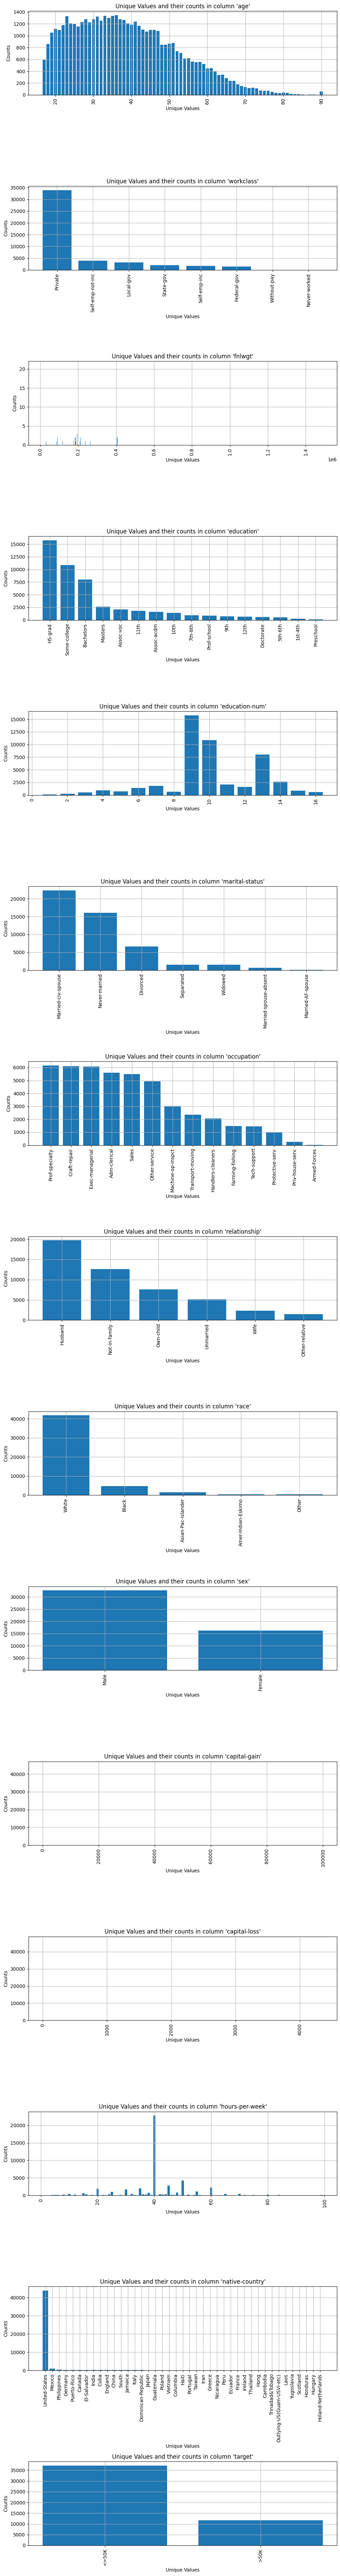

In [12]:
num_rows = len(df_census_data.columns)
# print(num_rows)
fig, axs = plt.subplots(num_rows, 1, figsize=(10, 5*num_rows))

for i, column in enumerate(df_census_data.columns):
    unique_values_counts = df_census_data[column].value_counts()
    axs[i].bar(unique_values_counts.index, unique_values_counts.values)
    axs[i].set_title(f"Unique Values and their counts in column '{column}'")
    axs[i].set_xlabel("Unique Values")
    axs[i].set_ylabel("Counts")
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=90) 

plt.tight_layout()
plt.show()


### Describing the census data

In [13]:
df_census_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


## Plotting against one another

In [14]:
import seaborn as sns

In [15]:
# sns.countplot(df_census_data["target"], palette="coolwarm", hue="sex", data=df_census_data);

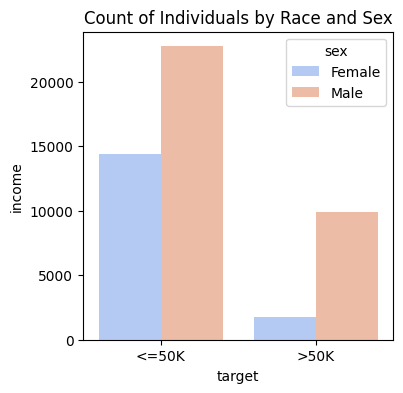

In [16]:
plt.figure(figsize=(4, 4))
sns.countplot(x="target", hue="sex", palette="coolwarm", data=df_census_data)
plt.title("Count of Individuals by Race and Sex")
plt.xlabel("target")
plt.ylabel("income")
plt.show()

#### Checking the mode of the each column in the dataframe

In [27]:
df_census_data.mode()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,36,Private,203488,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K


#### Filling the values

Filling up the null values with the mode so it can preserve the data distribution and can minimal impact in statistics. (type of Imputation)

In [37]:
df_census_data["workclass"] = df_census_data["workclass"].fillna("Private")

In [38]:
df_census_data["occupation"] = df_census_data["occupation"].fillna("Prof-specialty")

In [39]:
df_census_data["native-country"] = df_census_data["native-country"].fillna("United-States")

In [41]:
# Checking if there are still null values.
df_census_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

#### Feature Engineering

In [29]:
df_census_data.education = df_census_data.education.replace(['Preschool', '1st-4th', '5th-6th','7th-8th', '9th', '10th', '11th', '12th'], "School")

In [30]:
df_census_data.education = df_census_data.education.replace('HS-grad', "High-school") 

In [31]:
# df_census_data.education = df_census_data.education.replace('HS-grad', "igh-school")

### Converting the target value in the DataFrame

In [ ]:
df_census_data.target = df_census_data.target.replace('<=50K', "0") # Assuming <=50K as 0 for the model input

In [ ]:
df_census_data.target = df_census_data.target.replace('>50K', "1") # Assuming >50K as 1 for the model input

### Save the dataframe to a CSV file

In [ ]:
df_census_data.to_csv('adult.csv', index=False)